# Introduction to Dimensionality Reduction

Dimensionality reduction is a key technique in data analysis, particularly useful in dealing with high-dimensional data. It helps in reducing the number of features while retaining most of the important information, which simplifies the model, improves performance, and aids in data visualization.


# Dataset Loading

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Walmart_Store_sales.csv'
walmart_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
walmart_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

# Converting 'Date' to datetime
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

# Check for missing values
missing_values = walmart_data.isnull().sum()

# Standardizing the data (excluding 'Date' and 'Store' as they are not features to be used in dimensionality reduction)
features_to_scale = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
scaler = StandardScaler()
walmart_data[features_to_scale] = scaler.fit_transform(walmart_data[features_to_scale])
X_scaled = walmart_data[features_to_scale]
y= walmart_data['Store']
# Displaying missing values information and first few rows after preprocessing
missing_values, walmart_data.head()

<ipython-input-2-2a4d5dba0ee1>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])


(Store           0
 Date            0
 Weekly_Sales    0
 Holiday_Flag    0
 Temperature     0
 Fuel_Price      0
 CPI             0
 Unemployment    0
 dtype: int64,
    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
 0      1 2010-05-02      1.057420     -0.274204    -0.995136   -1.713800   
 1      1 2010-12-02      1.054348      3.646917    -1.201170   -1.766089   
 2      1 2010-02-19      1.001206     -0.274204    -1.124178   -1.840166   
 3      1 2010-02-26      0.642828     -0.274204    -0.760907   -1.737766   
 4      1 2010-05-03      0.899914     -0.274204    -0.767955   -1.598328   
 
         CPI  Unemployment  
 0  1.004175      0.056964  
 1  1.007880      0.056964  
 2  1.009074      0.056964  
 3  1.009849      0.056964  
 4  1.010624      0.056964  )

# PCA (Principal Component Analysis)

PCA is a technique that reduces the dimensionality of the data by transforming it to a new set of variables (principal components) that are orthogonal (uncorrelated), while retaining most of the variation in the data.


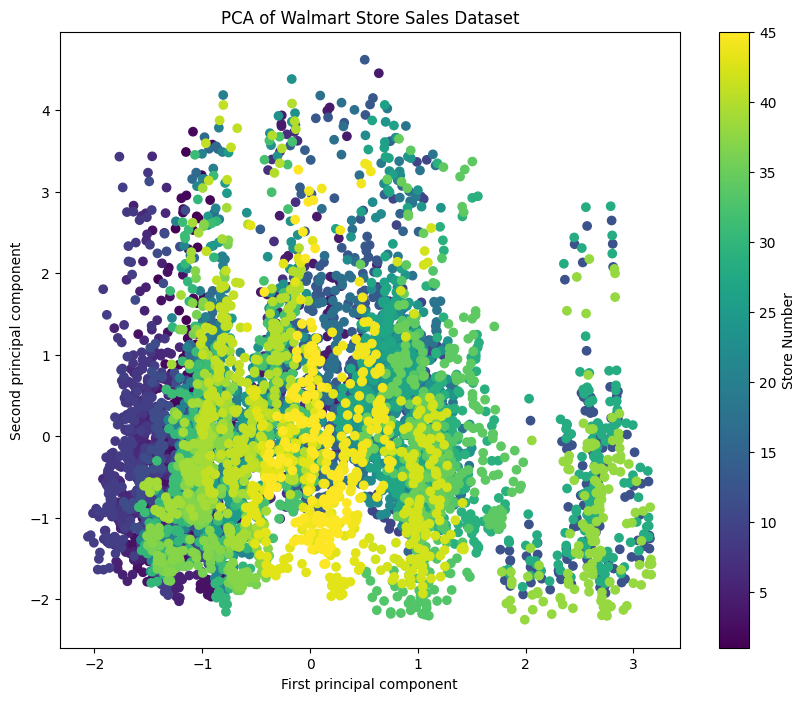

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecting the features for dimensionality reduction
features = walmart_data[features_to_scale]

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=walmart_data['Store'], cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Walmart Store Sales Dataset')
plt.colorbar(label='Store Number')
plt.show()

# SVD (Singular Value Decomposition)

SVD is a mathematical technique used to decompose a matrix into three other matrices. It can be used for dimensionality reduction, particularly in sparse datasets.


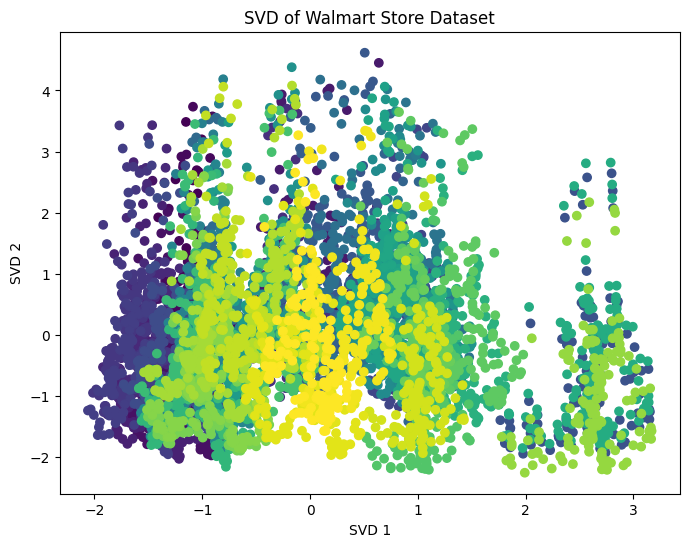

In [4]:
from sklearn.decomposition import TruncatedSVD

# SVD transformation
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(walmart_data[features_to_scale])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y)
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')
plt.title('SVD of Walmart Store Dataset')
plt.show()


# MDS (Multidimensional Scaling)

MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric space.


In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt


# Applying MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(features)

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=walmart_data['Store'], cmap='viridis')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('MDS of Walmart Store Sales Dataset')
plt.colorbar(label='Store Number')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


# ISOMap

ISOMap (Isometric Mapping) is a non-linear dimensionality reduction method which is based on a geometric theory of manifold learning.


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages

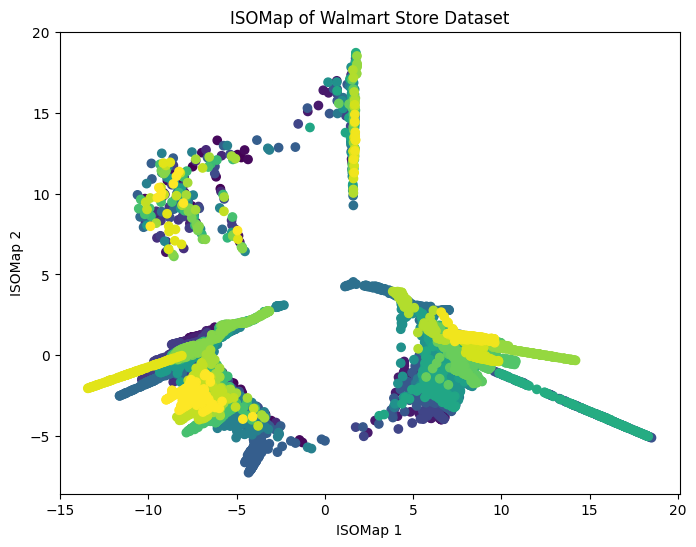

In [5]:
from sklearn.manifold import Isomap

# ISOMap transformation
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
plt.xlabel('ISOMap 1')
plt.ylabel('ISOMap 2')
plt.title('ISOMap of Walmart Store Dataset')
plt.show()

# LLE (Locally Linear Embedding)

LLE is a non-linear dimensionality reduction technique. It computes low-dimensional, neighborhood-preserving embeddings of high-dimensional inputs.


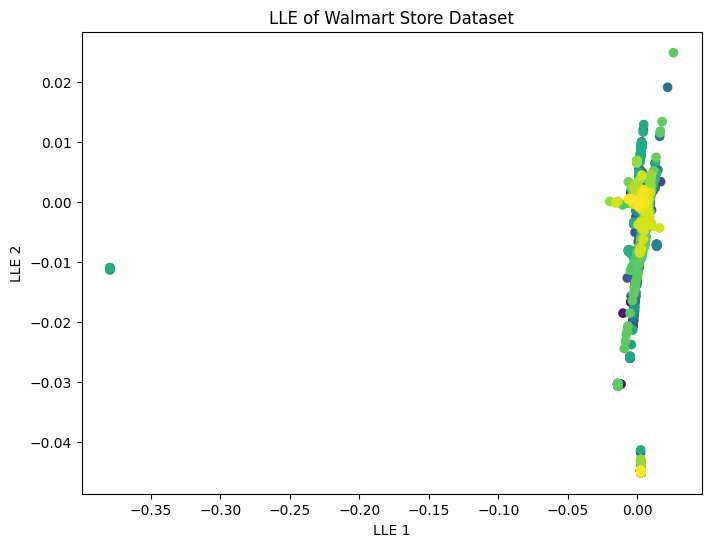

In [6]:
from sklearn.manifold import LocallyLinearEmbedding

# LLE transformation
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y)
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.title('LLE of Walmart Store Dataset')
plt.show()

# UMAP (Uniform Manifold Approximation and Projection)

UMAP is a novel manifold learning technique for dimension reduction. UMAP is particularly effective for visualizing clusters or groups of data points and their relative proximities.


In [7]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=cb28a4869ae3875755045796420edc59a23be5f2624b52d97a27f77915e64eaa
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


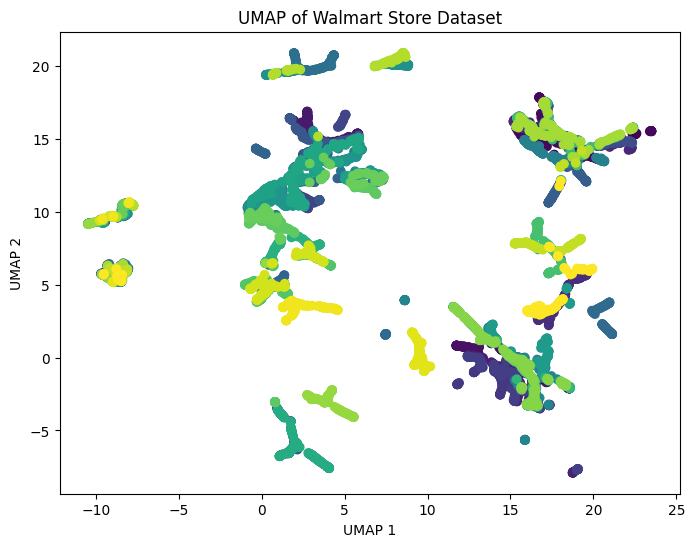

In [11]:
import umap

# UMAP transformation
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP of Walmart Store Dataset')
plt.show()

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a non-linear dimensionality reduction technique which is particularly well suited for the visualization of high-dimensional datasets.


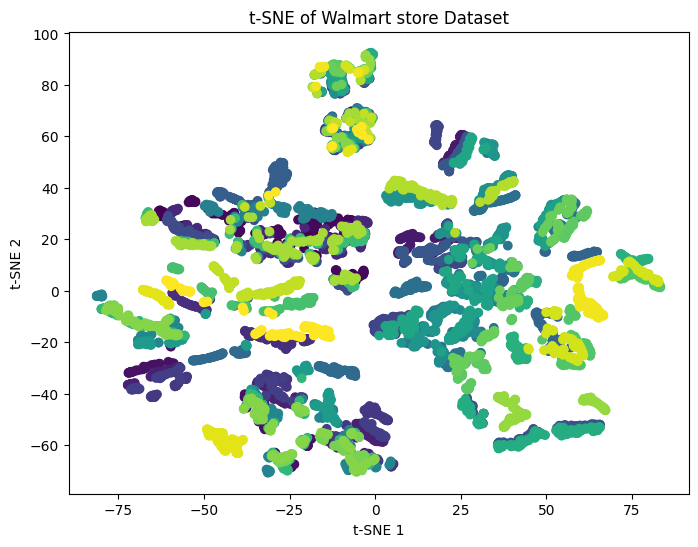

In [9]:
from sklearn.manifold import TSNE

# t-SNE transformation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Walmart store Dataset')
plt.show()


# Comparative Analysis

In this section, we compare the results of the various dimensionality reduction techniques applied to the same dataset. This comparison helps us understand the strengths and weaknesses of each method in different scenarios.

# Conclusion

Dimensionality reduction is a powerful tool in the data scientist's toolkit. It is important to choose the right technique based on the dataset characteristics and the specific problem at hand. This notebook provides a basic understanding and practical application of some of the most popular dimensionality reduction techniques.
